In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# Load Data

train_data = pd.read_csv('train.csv')
test_in_data = pd.read_csv('test_in.csv')
test_out_data = pd.read_csv('test_out.csv')

In [3]:
# Describe Data

train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# Datatypes of each columns

train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
# Number of Missing Values

column_names = train_data.columns
for column in column_names:
    print(column + ' - ' + str(train_data[column].isnull().sum()))

PassengerId - 0
Survived - 0
Pclass - 0
Name - 0
Sex - 0
Age - 177
SibSp - 0
Parch - 0
Ticket - 0
Fare - 0
Cabin - 687
Embarked - 2


In [6]:
# Remove unnecessary columns

train_data = train_data.drop(columns=['Ticket', 'PassengerId', 'Cabin'])
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [7]:
# Map 'Sex' and 'Embarked' to numerical values

train_data['Sex'] = train_data['Sex'].map({'male':0, 'female':1})
train_data['Embarked'] = train_data['Embarked'].map({'C':0, 'Q':1, 'S':2})
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,2.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,0.0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,2.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,2.0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,2.0


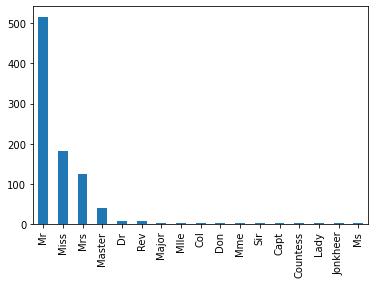

In [8]:
# Extarct title from name of the passenger and categorize them

train_data['Title'] = train_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
train_data = train_data.drop(columns='Name')
train_data.Title.value_counts().plot(kind='bar')

Text(0, 0.5, 'Passenger count')

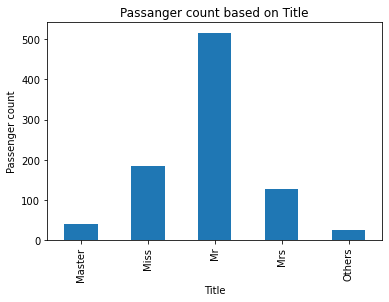

In [9]:
train_data['Title'] = train_data['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don'], 'Others')
train_data['Title'] = train_data['Title'].replace('Ms', 'Miss')
train_data['Title'] = train_data['Title'].replace('Mme', 'Mrs')
train_data['Title'] = train_data['Title'].replace('Mlle', 'Miss')
plt = train_data.Title.value_counts().sort_index().plot(kind='bar', title='Passanger count based on Title')
plt.set_xlabel('Title')
plt.set_ylabel('Passenger count')

In [10]:
# Map 'Title' to numerical values

train_data['Title'] = train_data['Title'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Others':4})
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,2.0,2
1,1,1,1,38.0,1,0,71.2833,0.0,3
2,1,3,1,26.0,0,0,7.9250,2.0,1
3,1,1,1,35.0,1,0,53.1000,2.0,3
4,0,3,0,35.0,0,0,8.0500,2.0,2


In [11]:
# Handling missing values

train_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         0
dtype: int64

In [12]:
# Impute 'Embarked' with it's majority class as there are two null values

train_data['Embarked'] = train_data['Embarked'].fillna(2)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,2.0,2
1,1,1,1,38.0,1,0,71.2833,0.0,3
2,1,3,1,26.0,0,0,7.9250,2.0,1
3,1,1,1,35.0,1,0,53.1000,2.0,3
4,0,3,0,35.0,0,0,8.0500,2.0,2


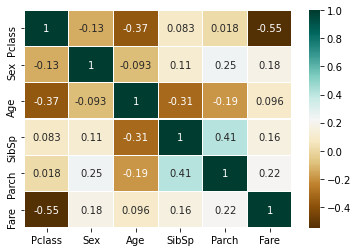

In [15]:
#  Find the columns that are useful to predict the value of missing Ages

corr_matrix = train_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
sns.heatmap(data = corr_matrix,cmap='BrBG', annot=True, linewidths=0.2)

In [16]:
# Age is not correlated with 'Sex' and 'Fare'
# Filling Age with the median age of similar rows from 'Pclass', 'SibSp' and 'Parch'
# If there are no similar rows, fill the age with the median age of total dataset

NaN_indexes = train_data['Age'][train_data['Age'].isnull()].index
for i in NaN_indexes:
    pred_age = train_data['Age'][((train_data.SibSp == train_data.iloc[i]["SibSp"]) & (train_data.Parch == train_data.iloc[i]["Parch"]) & (train_data.Pclass == train_data.iloc[i]["Pclass"]))].median()
    if not np.isnan(pred_age):
        train_data['Age'].iloc[i] = pred_age
    else:
        train_data['Age'].iloc[i] = train_data['Age'].median()

C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [17]:
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

In [18]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,2.0,2
1,1,1,1,38.0,1,0,71.2833,0.0,3
2,1,3,1,26.0,0,0,7.9250,2.0,1
3,1,1,1,35.0,1,0,53.1000,2.0,3
4,0,3,0,35.0,0,0,8.0500,2.0,2


In [20]:
# Preprocess test data

test_in_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [22]:
# Drop 'Ticket', 'PassengerId' and 'Cabin' columns

test_in_data = test_in_data.drop(columns=['Ticket', 'PassengerId', 'Cabin'])
test_in_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


In [23]:
# Convert 'Sex' and 'Embarked' to Numerical values

test_in_data['Sex'] = test_in_data['Sex'].map({'male':0, 'female':1})
test_in_data['Embarked'] = test_in_data['Embarked'].map({'C':0, 'Q':1, 'S':2})
test_in_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Kelly, Mr. James",0,34.5,0,0,7.8292,1
1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,7.0000,2
2,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,9.6875,1
3,3,"Wirz, Mr. Albert",0,27.0,0,0,8.6625,2
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,12.2875,2


In [24]:
# Extract 'Title' from 'Name' and convert to Numerical values

test_in_data['Title'] = test_in_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
test_in_data = test_in_data.drop(columns='Name')

test_in_data['Title'] = test_in_data['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don'], 'Others')
test_in_data['Title'] = test_in_data['Title'].replace('Ms', 'Miss')
test_in_data['Title'] = test_in_data['Title'].replace('Mme', 'Mrs')
test_in_data['Title'] = test_in_data['Title'].replace('Mlle', 'Miss')

test_in_data['Title'] = test_in_data['Title'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Others':4})

test_in_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,34.5,0,0,7.8292,1,2.0
1,3,1,47.0,1,0,7.0000,2,3.0
2,2,0,62.0,0,0,9.6875,1,2.0
3,3,0,27.0,0,0,8.6625,2,2.0
4,3,1,22.0,1,1,12.2875,2,3.0


In [26]:
# Number of missing values

test_in_data.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
Title        1
dtype: int64

In [28]:
# Impute 'Age' using median of columns 'SibSp', 'Parch' and 'Pclass'

NaN_indexes = test_in_data['Age'][test_in_data['Age'].isnull()].index

for i in NaN_indexes:
    pred_age = train_data['Age'][((train_data.SibSp == test_in_data.iloc[i]["SibSp"]) & (train_data.Parch == test_in_data.iloc[i]["Parch"]) & (test_in_data.Pclass == train_data.iloc[i]["Pclass"]))].median()
    if not np.isnan(pred_age):
        test_in_data['Age'].iloc[i] = pred_age
    else:
        test_in_data['Age'].iloc[i] = train_data['Age'].median()

C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [30]:
# Impute 'Title' with it's mode

title_mode = train_data.Title.mode()[0]
test_in_data.Title = test_in_data.Title.fillna(title_mode)

In [31]:
# Impute 'Fare' with it's mean

fare_mean = train_data.Fare.mean()
test_in_data.Fare = test_in_data.Fare.fillna(fare_mean)

In [33]:
test_in_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,34.5,0,0,7.8292,1,2.0
1,3,1,47.0,1,0,7.0000,2,3.0
2,2,0,62.0,0,0,9.6875,1,2.0
3,3,0,27.0,0,0,8.6625,2,2.0
4,3,1,22.0,1,1,12.2875,2,3.0


In [34]:
test_in_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64